<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#시계열--탐색" data-toc-modified-id="시계열--탐색-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>시계열  탐색</a></span><ul class="toc-item"><li><span><a href="#Rolling-Window" data-toc-modified-id="Rolling-Window-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Rolling Window</a></span></li><li><span><a href="#정상성-검정" data-toc-modified-id="정상성-검정-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>정상성 검정</a></span></li></ul></li><li><span><a href="#일변량-시계열-분석" data-toc-modified-id="일변량-시계열-분석-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>일변량 시계열 분석</a></span><ul class="toc-item"><li><span><a href="#ETS" data-toc-modified-id="ETS-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>ETS</a></span><ul class="toc-item"><li><span><a href="#Decompose" data-toc-modified-id="Decompose-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Decompose</a></span></li><li><span><a href="#Simple-Exponential-Smoothing" data-toc-modified-id="Simple-Exponential-Smoothing-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Simple Exponential Smoothing</a></span></li></ul></li><li><span><a href="#Holt's-winter" data-toc-modified-id="Holt's-winter-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Holt's winter</a></span></li><li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>ARIMA</a></span><ul class="toc-item"><li><span><a href="#파라메터-최적화" data-toc-modified-id="파라메터-최적화-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>파라메터 최적화</a></span></li></ul></li><li><span><a href="#ARIMA-Simulation" data-toc-modified-id="ARIMA-Simulation-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>ARIMA Simulation</a></span><ul class="toc-item"><li><span><a href="#Facebook-prophet-model" data-toc-modified-id="Facebook-prophet-model-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Facebook prophet model</a></span></li></ul></li><li><span><a href="#다변량-시계열분석" data-toc-modified-id="다변량-시계열분석-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>다변량 시계열분석</a></span><ul class="toc-item"><li><span><a href="#VAR" data-toc-modified-id="VAR-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>VAR</a></span></li><li><span><a href="#UCM" data-toc-modified-id="UCM-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>UCM</a></span></li><li><span><a href="#Hierachial-time-series" data-toc-modified-id="Hierachial-time-series-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Hierachial time series</a></span></li><li><span><a href="#Middle-out" data-toc-modified-id="Middle-out-5.5.4"><span class="toc-item-num">5.5.4&nbsp;&nbsp;</span>Middle out</a></span></li></ul></li></ul></li><li><span><a href="#결론" data-toc-modified-id="결론-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>결론</a></span></li></ul></div>

In [2]:
# Libraries

import numpy as np # Linear algebra
import pandas as pd # file I/O
import os #file I/O

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

# str to datetime
import datetime

# settings
import warnings
warnings.filterwarnings("ignore")

# time series
import time
import statsmodels.api as sm #Seasonal Decomposition
import statsmodels.tsa.api as smt # ts result
import scipy.stats as st # stats

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic # stationarity test
# |rom fbprophet import Prophet # facebook prophet model
from statsmodels.tsa.arima_model import ARIMA # ARIMA

from sklearn.metrics import mean_squared_error as mse


## Overview

**Purpose**  
매장에 따른 상품의 다음달(2015년 11월) 판매량을 예측한다.  
데이터는 일별 매출을 기록하고 있기때문에 월별 판매량으로 바꾸어 탐색한다.

**Data Info**  
러시아 IT사 [1C Company](http://1c.ru/eng/title.html)가 제공한 상품 판매 데이터.
- sales_train.csv : 2013년 1월부터 2015년 10월까지의 상품 판매 정보
- test.csv : 2015년 11월 매출 예측
- sample_submission.csv : 제출 파일 양식
- items.csv : 상품 정보
- item_categories.csv : 상품 카테고리 정보
- shops.csv : 매장 정보

**Data Description**
- ID : (매장, 상품) 튜플(Tuple) 형식 *train_v2에서 사라진것으로 보임*
- shop_id : 매장 ID
- item_id - 상품 ID
- item_category_id - 상품 카테고리 ID
- item_cnt_day - 판매량(You are predicting a monthly amount of this measure)
- item_price - 현재 상품 가격
- date - 날짜
- date_block_num - 2013년 1월부터 2015년 10월까지 순서대로 번호를 할당한 값.(ex 2013년 1월 :1, 2015년 10월:33)
- item_name - 상품 이름
- shop_name - 매장 이름
- item_category_name - 상품 가테고리 이름


**Evaluation**  
[RMSE(Root Mean Squre Error)](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

**Link**  
[Predict Future Sales](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data)


**References**  
[Time series Basics : Exploring traditional TS](https://www.kaggle.com/jagangupta/time-series-basics-exploring-traditional-ts)  
[Feature engineering, xgboost](https://www.kaggle.com/dlarionov/feature-engineering-xgboost)  
[StatsModels](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)  
[Rolling-window Analysis](https://www.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html)  
[GeeksforGeeks](https://www.geeksforgeeks.org/python-pandas-Gdataframe-rolling/)  
[Forecasting: principles and practice](https://otexts.com/fpp2/hierarchical.html)
[How to Create an ARIMA model](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)  
[Facebook prophet](https://facebook.github.io/prophet/docs/quick_start.html)  
[계층적 시계열](https://otexts.com/fppkr/hts.html)

다변량 시계열 분석에 앞서 월별 판매량 평균으로 일변량 시계열 분석을 해본다.

* 시계열 정상성 검정
    * ADF, KPSS, PP
* 시계열 모델링
    * 일변수 시계열
        * Simple Average
        * Moving Average
        * ETS(P,P,P) P = (A,M,N)
            * Simple Explonential smoothing method
            * Holt's linear trend
            * Exponetial trend
            * Holt's winter-seasonal method
        * ARIMA
    * 다변수 시계열
        * UCM
        * Vector Auro Regression(VAR)
        * Hirachial
        * LDTM

In [4]:
# 데이터 불러오기
df_train = pd.read_csv('data/sales_train_v2.csv')
df_items = pd.read_csv('data/items.csv')
df_shops = pd.read_csv('data/shops.csv')
df_item_categories = pd.read_csv('data/item_categories.csv')
df_test = pd.read_csv('data/test.csv')
df_sub = pd.read_csv('data/sample_submission.csv')

## Data Preparation
date를 datetime 형식으로 바꾼다.  
month - shop - item에 따른 date(min,max), item_price(mean), item_cnt_day(sum)을 확인한다.

In [5]:
# date to datetime
tmp = df_train['date'].apply(lambda x: [int(x) for x in x.split('.')])
df_train['date'] = tmp.apply(lambda x : datetime.datetime(x[2],x[1],x[0]))

In [6]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB
None


In [45]:
df_monthly_sales = df_train.groupby(['date_block_num','item_id'])['item_cnt_day'].sum()

In [67]:
mean_sales = []
for i in range(0,34):
    mean_sales.append(df_monthly_sales.loc[i].mean())
mean_sales = pd.Series(mean_sales)
    

## EDA

## 시계열  탐색

### Rolling Window 

**Rolling Window**
* 시계열의 정상성을 확인하는 분석방법으로 샘플링과 유사하다. 시계열 모델의 성능을 평가할 때도 사용한다.
![Rolling Window 개념도](https://www.mathworks.com/help/econ/rollingwindow.png)
* DataFrame.rolling(window, min_periods=None, freq=None, center=False, win_type=None, on=None, axis=0, closed=None)
    * window : rolling window 한개에 포함되는 데이터 수. rolling window를 크게 설정하면 그래프가 완만해진다.
    * min_period : rolling window 한개에 들어갈 수 있는 데이터의 최소 수
    * freq : 
    * center : rolling window 중앙값에 라벨 표시
    * on : rolling window를 적용할 컬럼
    * closed : rolling window의 경계 범위( right : 오른쪽 끝값 포함, both : 양쪽 포함)
* rolling.mean : window 하나에 있는 시계열의 평균값이다.
* rolling.std : window 하나에 있는 시계열의 표준편차다.

- Trend : 거의 일정
- Seasonality : 1년에 한번 최고점을 찍는 경향
- Cycle : 25-30

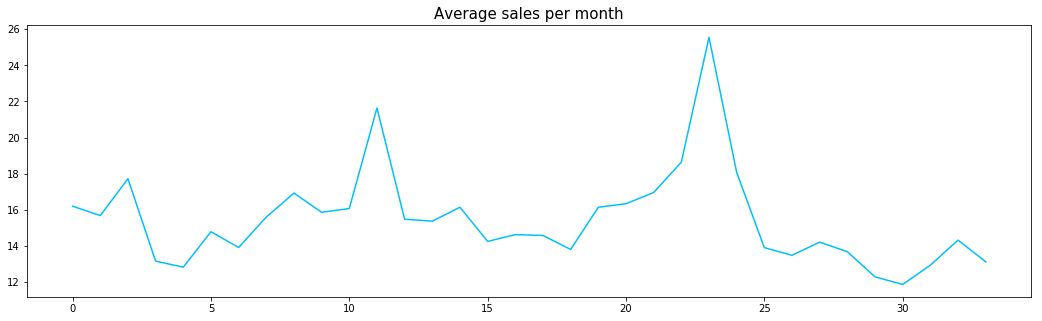

In [69]:
# 월별 판매량 시계열 그래프
# 1년에 한번(10월-12월) 판매량 최댓값을 달성하는 추세를 보인다.
plt.figure(figsize = (18,5))
sb.lineplot(x=mean_sales.index, y= mean_sales,color = 'deepskyblue')
plt.title('Average sales per month',fontsize = 15)
plt.show()

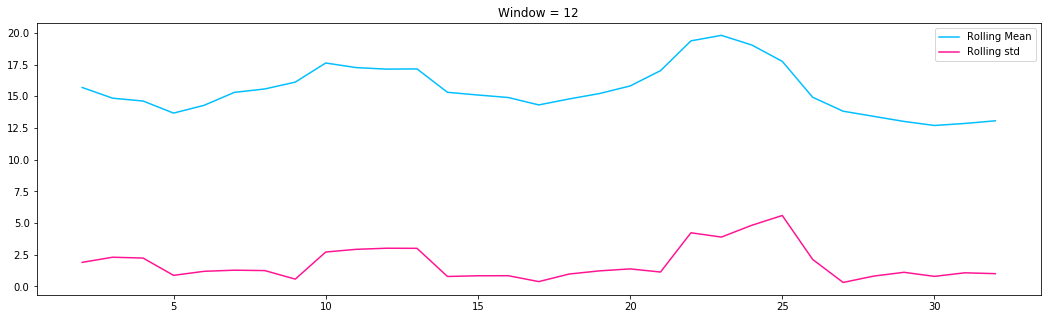

In [73]:
# 이동 평균과 표준편차를 시각화한다.
# 이동평균, 이동 표준편차 일정 => 계절성이 있다(1년)
# 이동 평균이 약간 증가하는 경향이 있다.
# window = 4 (4분기)
plt.figure(figsize = (18,5))
plt.plot(mean_sales.rolling(window=4, center = True).mean(),label = 'Rolling Mean',color='deepskyblue')
plt.plot(mean_sales.rolling(window=4, center = True).std(),label = 'Rolling std',color='deeppink')
plt.title('Window = 12')
plt.legend()
plt.show()

### 정상성 검정

정상시계열은 시간에 따라 1) 평균이 일정하고, 2)분산이 일정하며, 3) Level의 공분산이 일정해야한다. 
정상시계열에서 두 점의 속성은 오직 시간차에만 연관된다. 시계열의 정상성을 검정하는 방법은 3가지가 있다.
- ADF(Augumented Dicky Fuller Test)
- KPSS
- PP(Phillips-perron-test)

In [74]:
#ADF 정상성 검정
def adf_test(ts):
    # AIC로 Autolag
    res_adfuller = adfuller(ts, autolag = 'AIC')
    res = pd.Series(res_adfuller[0:4],index = ['검정통계량','p-value','Lags Used','사용한 관측치 개수'])
    for key,val in res_adfuller[4].items():
        res[f'Critical Value ({key})'] = val
    print(res)

In [75]:
adf_test(mean_sales)
# p-val <0.05, 정상성

검정통계량                   -3.260298
p-value                  0.016749
Lags Used                0.000000
사용한 관측치 개수              33.000000
Critical Value (1%)     -3.646135
Critical Value (5%)     -2.954127
Critical Value (10%)    -2.615968
dtype: float64


In [76]:
# lags
def diff_ts(df,interval):
    diff = []
    for i in range(interval, len(df)):
        val = df[i]-df[i-interval]
        diff.append(val)
    return pd.Series(diff)

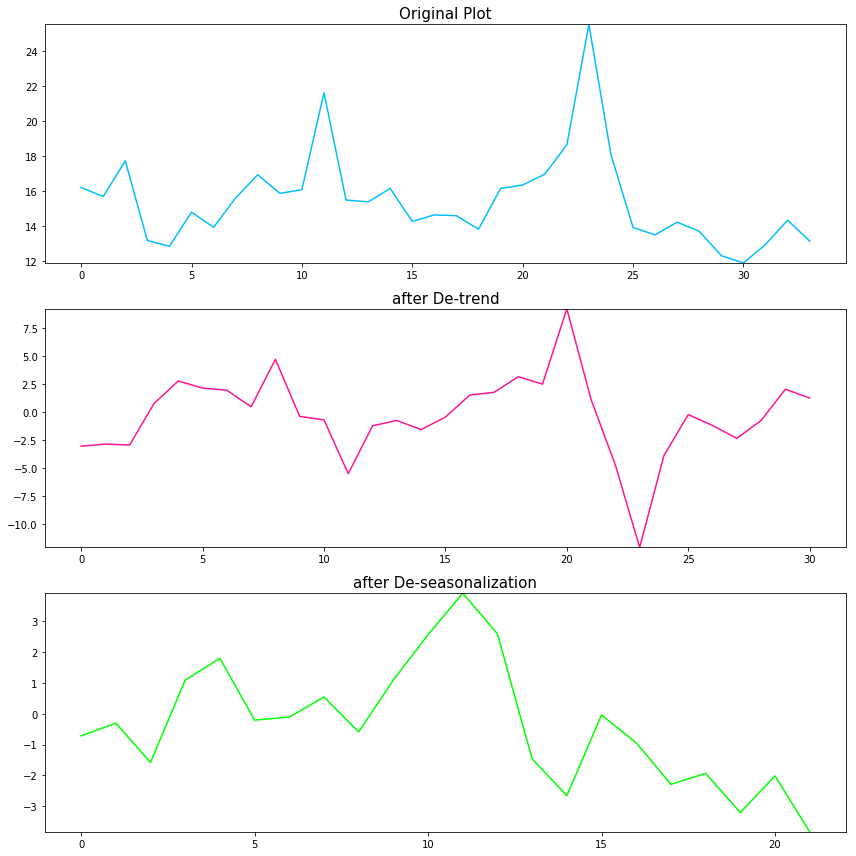

In [78]:
# 추세, 계절성을 제거한 이후 정상성을 검정해본다.
fig,ax = plt.subplots(3,1,figsize = (12,12))

#원래 시계열
ax[0].plot(mean_sales,color = 'deepskyblue')
ax[0].set_title('Original Plot',fontsize = 15)
ax[0].set_ylim(min(mean_sales),max(mean_sales))

# 추세를 제거한 시계열
# -1 
de_trend = diff_ts(mean_sales, interval = 3)
ax[1].plot(de_trend,color = 'deeppink')
ax[1].set_title('after De-trend',fontsize = 15)
ax[1].set_ylim(min(de_trend),max(de_trend))

# 계절성을 제거한 시계열
# -12 
de_seasonal = diff_ts(mean_sales, interval = 12)
ax[2].plot(de_seasonal,color = 'lime')
ax[2].set_title('after De-seasonalization',fontsize =15)
ax[2].set_ylim(min(de_seasonal),max(de_seasonal))
plt.tight_layout()
plt.show()

In [79]:
# 추세 제거한 시계열의 정상성 검정
print("="*15 +"de-trend ts"+"="*15)
adf_test(de_trend)

# 계절성을 제거한 시계열의 정상성 검정
print("="*15 +"de-seaonal ts"+"="*15)
adf_test(de_seasonal)

===============de-trend ts===============
검정통계량                   -1.565824
p-value                  0.500735
Lags Used                9.000000
사용한 관측치 개수              21.000000
Critical Value (1%)     -3.788386
Critical Value (5%)     -3.013098
Critical Value (10%)    -2.646397
dtype: float64
===============de-seaonal ts===============
검정통계량                   -4.799133
p-value                  0.000055
Lags Used                9.000000
사용한 관측치 개수              12.000000
Critical Value (1%)     -4.137829
Critical Value (5%)     -3.154972
Critical Value (10%)    -2.714477
dtype: float64


## 일변량 시계열 분석

### ETS

이동평균을 기반 시계열 분해 모듈  일반적으로 시계열은 다음과 같이 분해된다.  
E<sub>t</sub> : 잔차항, 실제 시계열에서 T,C,S를 제거했을 때 남는 잔차항이다.  
T<sub>t</sub> : 시계열의 장기적인 속성을 고려한 추세항이다. 추세는 시계열의 값이 지속적으로 증가하거나 감소할때 나타난다.   
S<sub>t</sub> :  계절항, 시계열에서 계절성이 발견될 때 사용. 일,월,년,주 등 알려진 주기를 취한다.  

C<sub>t</sub> : 주기항, 반복되지만 알려진 주기를 가지지 않는다. 일반적으로 최소 2년간 지속된다.  


additive model 은 추세항의 변동이 없을때, multiplicative model은 추세항의 변동이 있을때 사용한다.
- additive model : y(t) = Level + Trend + Seasonality + Noise
- multiplicative model :y(t) = Level * Trend * Seasonality * Noise


**추세와 계절성에 따른 시계열 시나리오** 

| Seasonal/ Trend     | No- Trend                     | Linear Trend                  | Exponetial Trend                |
| ------------------- | ----------------------------- | ----------------------------- | ------------------------------- |
| No - Seasonal       | Simple Exponential Smoothing  | Holt's Linear Trend           | Exponential Trend, damped Trend |
| Constant Seasonal   | Holt's-Winter Seasonal Method | Holt's-Winter Seasonal Method | Holt's-Winter Seasonal Method   |
| Increasing Seasonal | Holt's-Winter Seasonal Method | Holt's-Winter Seasonal Method | Holt's-Winter Seasonal Method   |

#### Decompose

- Trend : 선형
- Seasonal :  Constant

In [80]:
def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

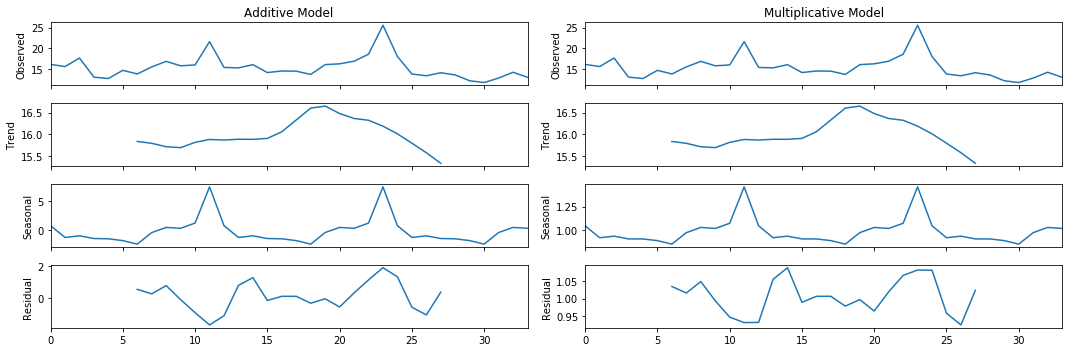

In [81]:
fig, ax = plt.subplots(ncols = 2,nrows=4,sharex = True,figsize = (15,5))
add_model = sm.tsa.seasonal_decompose(mean_sales,freq = 12, model = 'additive')
mul_model = sm.tsa.seasonal_decompose(mean_sales,freq = 12, model = 'multiplicative')
plotseasonal(add_model, ax[:,0])
ax[0,0].set_title('Additive Model')
plotseasonal(mul_model, ax[:,1])
ax[0,1].set_title('Multiplicative Model')

plt.tight_layout()
plt.show()

#### Simple Exponential Smoothing

$$
Forecast = Weight(t)Y(t) + Weight(t-1)Y(t-1) + Weight(t-2) Y(t-2) + ... + (1-α)^n Yn
$$

* alpha
  * 0 : Average Method, 전체 평균으로 예측한다.
  * 1 : Naive Method ,바로 이전 시계열 값으로 예측한다.
* 장점 : 오래된 데이터에 대한 감가상각률을 반영한다.
* 단점 : 갑자기 커지거나 작아지는 값(외상치)에 대해 민감하다. 추세나 계절성이 있는데이터에는 적용하기 어렵다.

* insample test 
    * simple exponential
        * naive model : 0.16160498891619762 
        * avg model : 0.14080895817796865
        * alpha(.5) model : 0.13222705391367434
    * holt's winter : 0.12800278270690205
    * ARIMA(1,2,2) : 0.14721377953331713
    * ARIMA(1,2,0) : 0.13808407905784123
    * fbprophet rmse : 0.010468705243291838


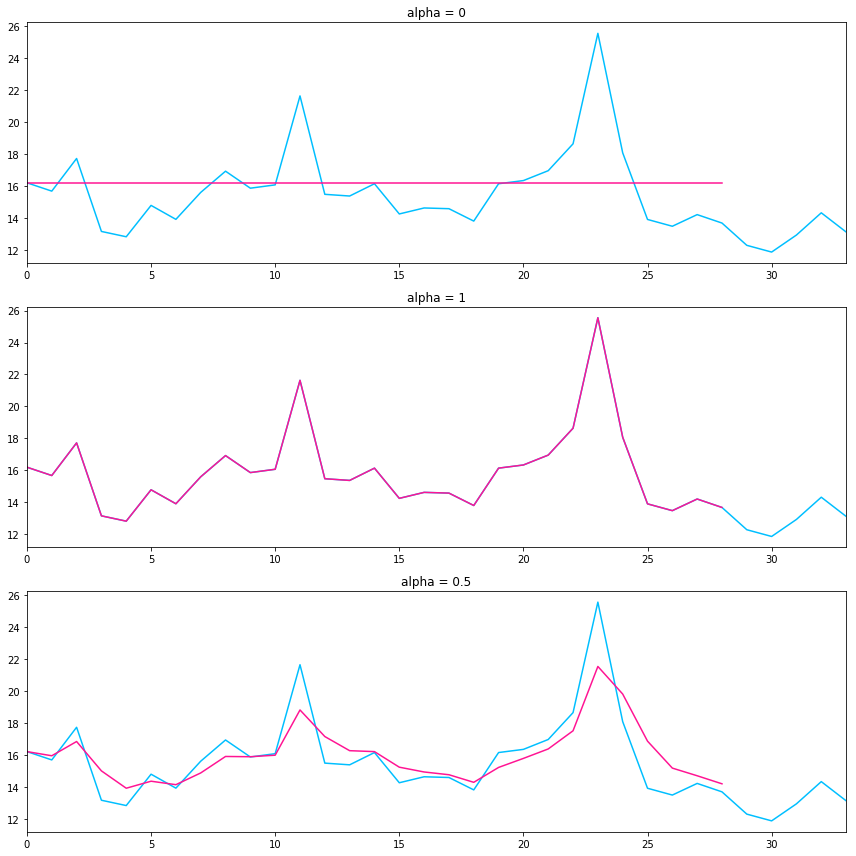

In [84]:
# 마지막값 5개를 insample test
fig,ax = plt.subplots(3,1,figsize = (12,12))

# Naive
naive_model = SimpleExpSmoothing(mean_sales[:-5]).fit(smoothing_level=0, optimized=False)
res = naive_model.level
ax[0].plot(mean_sales,color = 'deepskyblue')
res.plot(ax=ax[0],color = 'deeppink')
ax[0].set_title('alpha = 0')

#Average Method
avg_model = SimpleExpSmoothing(mean_sales[:-5]).fit(smoothing_level=1, optimized=False)
res = avg_model.level
ax[1].plot(mean_sales,color = 'deepskyblue')
res.plot(ax=ax[1],color = 'deeppink')
ax[1].set_title('alpha = 1')


#alpha = .5
alpha_model = SimpleExpSmoothing(mean_sales[:-5]).fit(smoothing_level=.5, optimized=False)
res = alpha_model.level
ax[2].plot(mean_sales,color = 'deepskyblue')
res.plot(ax=ax[2],color = 'deeppink')
ax[2].set_title('alpha = 0.5')

plt.tight_layout()
plt.show()

In [85]:
# insample test
y_pred_naive = naive_model.predict(start=29,end=33)
y_pred_avg = avg_model.predict(start=29,end=33)
y_pred_alpha= alpha_model.predict(start=29,end=33)

naive_rmse = np.sqrt(mse(mean_sales[-5:].values,y_pred_naive))
avg_rmse = np.sqrt(mse(mean_sales[-5:].values,y_pred_avg))
alpha_rmse = np.sqrt(mse(mean_sales[-5:].values,y_pred_alpha))

print(f'naive model : {naive_rmse} \navg model : {avg_rmse}\nalpha model : {alpha_rmse}')

naive model : 3.3968642171464998 
avg model : 1.1411059345822245
alpha model : 1.528143542677852


### Holt's winter

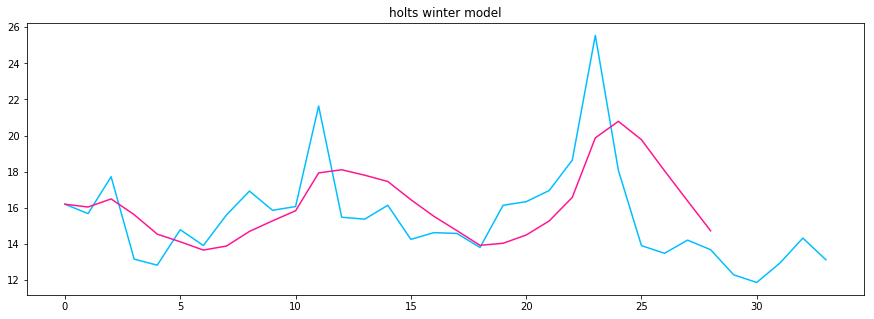

In [86]:
plt.figure(figsize = (15,5))
holt_model = Holt(mean_sales[:-5].values).fit(smoothing_level = 0.3, smoothing_slope = 0.5)
plt.plot(mean_sales,color = 'deepskyblue')
plt.plot(holt_model.level,color = 'deeppink')
# plt.plot(y_pred_holt,color = 'lime')
plt.title('holts winter model')
plt.show()

In [91]:
y_pred_holt = holt_model.predict(start=29,end=33)
holt_rmse = np.sqrt(mse(mean_sales[-5:],y_pred_holt))
print(f'holt model : {holt_rmse}')

holt model : 3.636218658270039


### ARIMA

* p,d,q 결정
    * ACF : 1 => p = 1
    * I : de_trend p-val<0.005, => 2
    * q : => 2
    * QQ plot : 잔차가 정규분포를 따른지는 않는다. 
    * ARIMA(1,2,2)

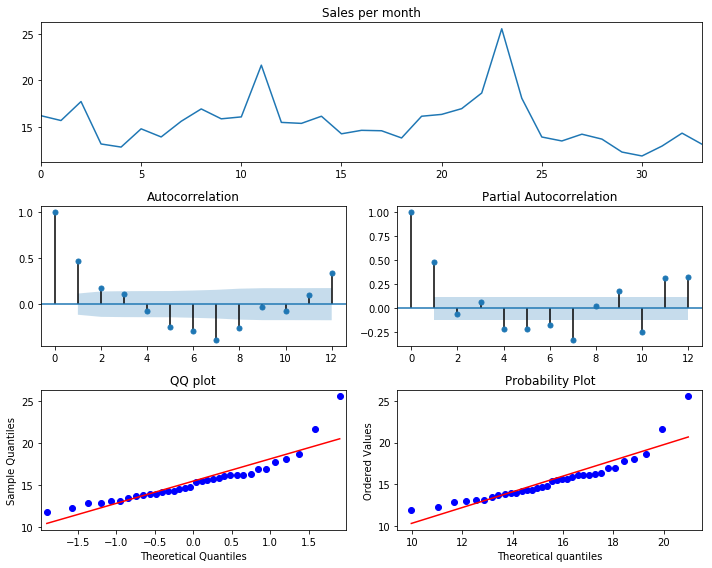

In [92]:
ts_res_plot(mean_sales,lags = 12,title = 'Sales per month')

In [108]:
arima_model = ARIMA(mean_sales[:-5],order = (1,2,1))
model_fit = arima_model.fit(disp = 0)
y_pred_arima = model_fit.forecast(5)[0]

In [110]:
y_rmse_arima = np.sqrt(mse(mean_sales[-5:].values,y_pred_arima))

In [111]:
y_rmse_arima

1.2592014735818755

#### 파라메터 최적화

In [114]:
# AIC로 최적 order 탐색
# AIC가 최소가 되는 order 선정

best_aic = np.inf
best_order = None
best_model  =None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(mean_sales[:-5], order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_model = tmp_mdl
        except: continue
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 148.23954 | order: (1, 2)


In [117]:
arima_model_best = ARIMA(mean_sales[:-5],order=(1,2,2))
model_fit_best = arima_model.fit(disp = 0)
y_pred_arima_best = model_fit.forecast(5)[0]
y_rmse_arima_best = np.sqrt(mse(mean_sales[-5:].values,y_pred_arima_best))

In [118]:
y_rmse_arima_best

1.2592014735818755

###  ARIMA Simulation

In [119]:
# AR, Autocorrlation, partial Autocorrelation, QQ plot, Probablilty plot
def ts_res_plot(y, lags, title, figsize=(10, 8), style='bmh'):
    plt.figure(figsize = figsize)
    layout = (3,2)
    
    # y를 Series로 변경
    if not isinstance(y,pd.Series): y= pd.Series(y)
    
    # axes 설정
    ts_ax = plt.subplot2grid(layout, (0,0),colspan =2)
    acf_ax = plt.subplot2grid(layout,(1,0))
    pacf_ax = plt.subplot2grid(layout,(1,1))
    qq_ax = plt.subplot2grid(layout,(2,0))
    pp_ax = plt.subplot2grid(layout,(2,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title) # ts
    smt.graphics.plot_acf(y,lags = lags,ax = acf_ax, alpha=.5) # acf
    smt.graphics.plot_pacf(y,lags = lags, ax = pacf_ax, alpha = .5) # pacf
    sm.qqplot(y, line = 's', ax = qq_ax) # qq 
    qq_ax.set_title('QQ plot')
    st.probplot(y,sparams = (y.mean(), y.std()),plot = pp_ax) # prob
    plt.tight_layout()
    

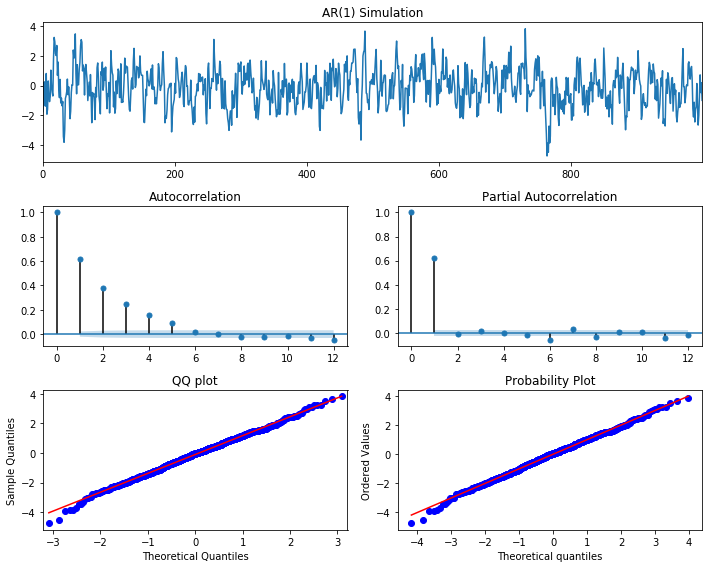

In [120]:
# alpha = 0.6, AR(1) 시뮬레이션
# lag = 1까지 정상성을 유지한다고 가정

np.random.seed(123)
n_samp = 1000
alpha = .6
x = w = np.random.normal(size = n_samp)
for t in range(n_samp):
    x[t] = alpha*x[t-1]+w[t]
lags = 12
ts_res_plot(x,lags=lags,title = 'AR(1) Simulation')

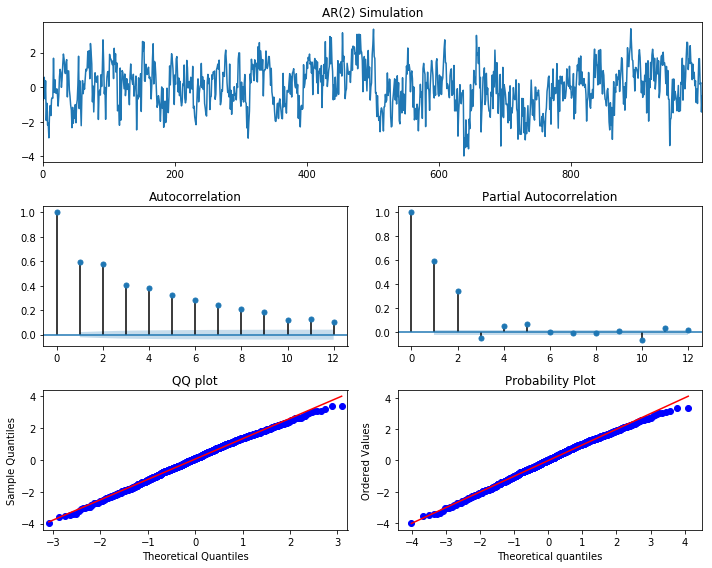

In [121]:
# AR(2) simulation
# leg = 2 까지 정상성을 유지한다고 가정
n = 1000
alphas  = np.array([.444,.333])
betas = np.array([0]) # for MA

ar = np.r_[1,-alphas]
ma = np.r_[1,betas]

ar2 = smt.arma_generate_sample(ar=ar,ma=ma,nsample = n)
ts_res_plot(ar2, lags = 12, title = 'AR(2) Simulation')

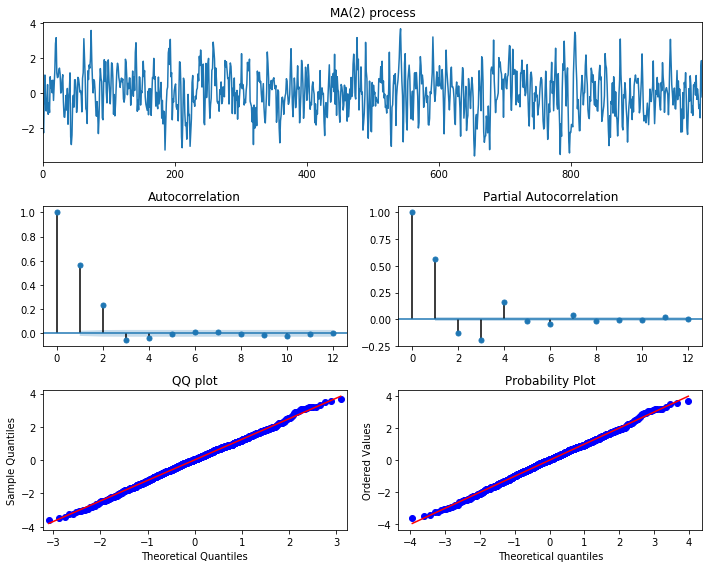

In [122]:
# Simulate MA(2) process with betas 0.6, 0.4
n = int(1000)
alphas = np.array([0.])
betas = np.array([0.6, 0.4])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma3 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
ts_res_plot(ma3, lags=12,title="MA(2) process")

#### Facebook prophet model

In [180]:
ts = df_train.groupby(by = ['date_block_num'])['item_cnt_day'].sum()
ts.index = pd.date_range(start = '2013-01-01',end = '2015-10-01',freq = 'MS')
# Series to DataFram
ts=ts.reset_index()

In [181]:
# set columns
ts.columns = ['ds','y']
model = Prophet( yearly_seasonality='18') #instantiate Prophet with only yearly seasonality as our data is monthly 
model.fit(ts) #fit the model with your dataframe

future = model.make_future_dataframe(periods = 2 , freq = 'MS')  
# now lets make the forecasts
forecast = model.predict(future)

NameError: name 'Prophet' is not defined

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
model.plot(forecast)

In [ ]:
model.plot_components(forecast)

### 다변량 시계열분석

#### VAR

#### UCM

Unobserved Components Model, 시계열을 추세, 계절, 주기, 오차항으로 나눈뒤 각각 항을 예측하고 합친다.

#### Hierachial time series

시계열 모델링 전 그룹을 나눠서 예측한다. 
- **Bottom up**
    - 모든 계층의 시계열을 모델링하고, 마지막에 합한다.
    - 장점 : 간단하고, 합칠때 정보손실이 없다.
    - 단점 : 하위 계층의 시계열에 노이즈가 크게 발생한다.
- **Top Down**
    - 최상위 계층(total sales)을 먼저 예측한다
    - 나머지 변수에 가중치를 지정한다.
    - 가중치를 지정하는 방법은 3가지가 있다.
        - Average Historical Proportions : 이전 시점 상품의 모든 기여량의 평균을 가중치로 지정한다.
        - Proportion of Historical Averages : 평균에 대한 비율을 가중치로 지정한다.
        - Forecated Proprotions : 이전 시점의 비율로 다음 시점의 비율을 예측한다.
- **Middle out**
    - Bottom up과 Top down을 모두 사용한다.
    - 중간계층(Stores)를 선정하고,이에 대한 예측값을 계산한다.
    - Bottom up 방법으로 중간계층에 대한 최고계층(Sales)값을 예측한다.
    - Top Down 방법으로 중간계층에 대한 가중치를 지정한다.
- **최적방법론 탐색방법**
    - 모든 계층을 독립적으로 예측한다.
    - df-hoc 최적화를 진행한다.

In [183]:
total_sales = df_train.groupby(by=['date_block_num'])['item_cnt_day'].sum()
dates = pd.date_range(start = '2013-01-01', end = '2015-10-01', freq = 'MS')
total_sales.index = dates
total_sales.head()

2013-01-01    131479.0
2013-02-01    128090.0
2013-03-01    147142.0
2013-04-01    107190.0
2013-05-01    106970.0
Freq: MS, Name: item_cnt_day, dtype: float64

In [184]:
monthly_sales.head()

NameError: name 'monthly_sales' is not defined

In [ ]:
# item - store 조합이 몇개있는지 찾는다.
monthly_sales  = df_train.groupby(by=['shop_id','item_id','date_block_num'])['item_cnt_day'].sum()

# hts 모델링을 위해 재정렬한다.
# -1 :date_block_num
monthly_sales = monthly_sales.unstack(level = -1).fillna(0)
monthly_sales = monthly_sales.T
dates = pd.date_range(start = '2013-01-01', end = '2015-10-01', freq = 'MS')
monthly_sales.index = dates
monthly_sales = monthly_sales.reset_index()
monthly_sales.head()

In [ ]:
start_time = time.time()

# bottom up 방식
# prophet으로 모든 base forecat를 계산한다.
# item-store 조합은 백만개를 초과하기때문에 시간이 너무 오래걸린다.
# 10개 돌리는데 25초 걸림, 1,000,000개 돌리는데는 약 250,000초 ~= 70시간 
# predict 에서 Value error 발생

forecast_dict = {}
for node in range(len(monthly_sales)):
    # 날짜 - 상점 - item case를 모두 예측한다.
    # [:,0] => 날짜, [:,node+1] => items
    node_to_forecast = pd.concat([monthly_sales.iloc[:,0],monthly_sales.iloc[:,node+1]],axis = 1)
    # prophet을 사용하기 위해 변수이름을 ds,y로 바꾼다.
    node_to_forecast.columns = node_to_forecast.columns.droplevel()
    node_to_forecast.columns = (['ds','y'])
    growth = 'linear'
    
    model = Prophet(growth, yearly_seasonality=18)
    model.fit(node_to_forecast)
    future = model.make_future_dataframe(periods = 2, freq = 'MS')
    forecast_dict[node] = model.predict(future)
    
    # 10개만 돌려본다
    if(node == 10):
        end_time = time.time()
        print(f"{node} took {end_time-start_time}")

#### Middle out

Store Level 예측

In [ ]:
# 월간 매장별 판매량
shop_sales = df_train.groupby(by=['date_block_num','shop_id'])['item_cnt_day'].sum()
shop_sales = shop_sales.unstack(level = -1)
shop_sales = shop_sales.fillna(0) # 판매량이 없는달은 0으로 채움
shop_sales.index = dates
shop_sales = shop_sales.reset_index()
shop_sales.head()

In [ ]:
# shop id 34개에 대해 각각 시계열 예측
forcast_dict = {}
for node in range(len(shop_sales)):
    node_to_forcast = pd.concat([shop_sales.iloc[:,0],shop_sales.iloc[:,node+1]],axis = 1)
    node_to_forcast.columns = ['ds','y']
    growth = 'linear'
    model = Prophet(growth,yearly_seasonality=18)
    model.fit(node_to_forcast)
    future = model.make_future_dataframe(periods = 2, freq = 'MS')
    forecast_dict[node] = model.predict(future)

In [ ]:
# forcast_dict 의 value 는 DataFrame
forecast_dict[0].tail()

In [ ]:
n_cols = len(list(forecast_dict.keys()))+1
for key in range(0,n_cols-1):
    f1 = np.array(forecast_dict[key].yhat)
    

## 결론

* fbprophet의 성능이 가장 좋음
* 다변량 시계열 분석 기법 조사
    * VAR, UCM, Hirachial
* Feature engineering
    * 상점 지역별 판매량 분포
    * 가격별 판매량 분포
    * 카테고리별 판매량 분포
* Modeling
    * item ID가 주어지면 p(store/itemID)를 계산하고, 가장 높은 값의 store를 할당.
    * item ID에 해당하는 category 할당
    * store에 따른 판매량 분포를 확인하고 가중치 적용(혹은 지역별 판매량 적용)